<a href="https://colab.research.google.com/github/AshbeeKim/Kaggle_task/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/data/kaggle"   
from google.colab import drive  
drive.mount('/content/drive')  
!cd /content/drive/MyDrive/data/kaggle  
!kaggle competitions download -c titanic
!unzip train.zip
!unzip test.zip
!unzip gender_submission.zip
!ls  

Mounted at /content/drive
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 10.3MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 19.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.69MB/s]
unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.
unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.
unzip:  cannot find or open gender_submission.zip, gender_submission.zip.zip or gender_submission.zip.ZIP.
drive  gender_submission.csv  sample_data  test.csv  train.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
# import mglearn
import graphviz
import warnings
warnings.filterwarnings('ignore')
# import statsmodels.api as sm

# 최대 줄 수 설정
pd.set_option('display.max_rows', 1500)
# 최대 열 수 설정
pd.set_option('display.max_columns', 1500)
# 표시할 가로의 길이
pd.set_option('display.width', 1500)

In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
gendersubmisssion = pd.read_csv('./gender_submission.csv')

data = train.copy()

In [ ]:
print(data.shape)
print(test.shape)
print(gendersubmisssion.shape)
print('='*150)
print(data.info())
print(test.info())
print(gendersubmisssion.info())

(891, 12)
(418, 11)
(418, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418

In [ ]:
print('='*150)
print(data.describe().round(3))
print('-'*150)
print(test.describe().round(3))
print('-'*150)
print(gendersubmisssion.describe().round(3))

       PassengerId  Survived   Pclass      Age    SibSp    Parch     Fare
count      891.000   891.000  891.000  714.000  891.000  891.000  891.000
mean       446.000     0.384    2.309   29.699    0.523    0.382   32.204
std        257.354     0.487    0.836   14.526    1.103    0.806   49.693
min          1.000     0.000    1.000    0.420    0.000    0.000    0.000
25%        223.500     0.000    2.000   20.125    0.000    0.000    7.910
50%        446.000     0.000    3.000   28.000    0.000    0.000   14.454
75%        668.500     1.000    3.000   38.000    1.000    0.000   31.000
max        891.000     1.000    3.000   80.000    8.000    6.000  512.329
------------------------------------------------------------------------------------------------------------------------------------------------------
       PassengerId   Pclass      Age    SibSp    Parch     Fare
count       418.00  418.000  332.000  418.000  418.000  417.000
mean       1100.50    2.266   30.273    0.447    0.392 

In [ ]:
print(data.columns)
print('-'*250)
print(test.columns)
print('-'*250)
print(gendersubmisssion.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['PassengerId', 'Survived'], dtype='object')


In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
all_columns = data.columns.values

categorical = ['Name','Sex','Ticket','Cabin','Embarked']

non_categorical = [value for value in all_columns if value not in categorical]

In [ ]:
print(data.Age.unique())
print('='*250)
print(data.Cabin.unique())
print('='*250)
print(data.Embarked.unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C8

In [ ]:
len(data[non_categorical].columns)//2

3

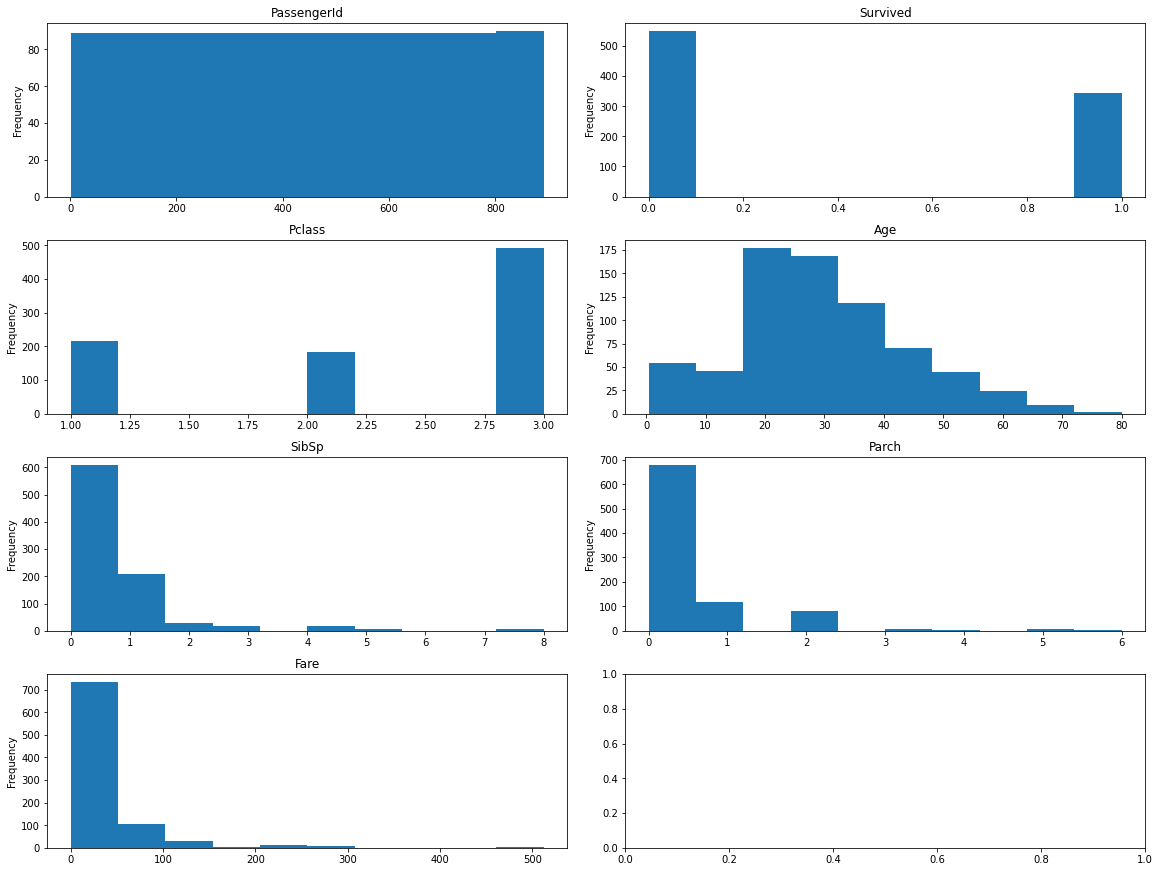

In [ ]:
n = len(data[non_categorical].columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(4,n//3,figsize=(16,12),constrained_layout=True)

for i, col in enumerate(data[non_categorical].columns):
  data[col].plot(kind='hist',ax=ax[i//2,i%2],title=col)
plt.show() 

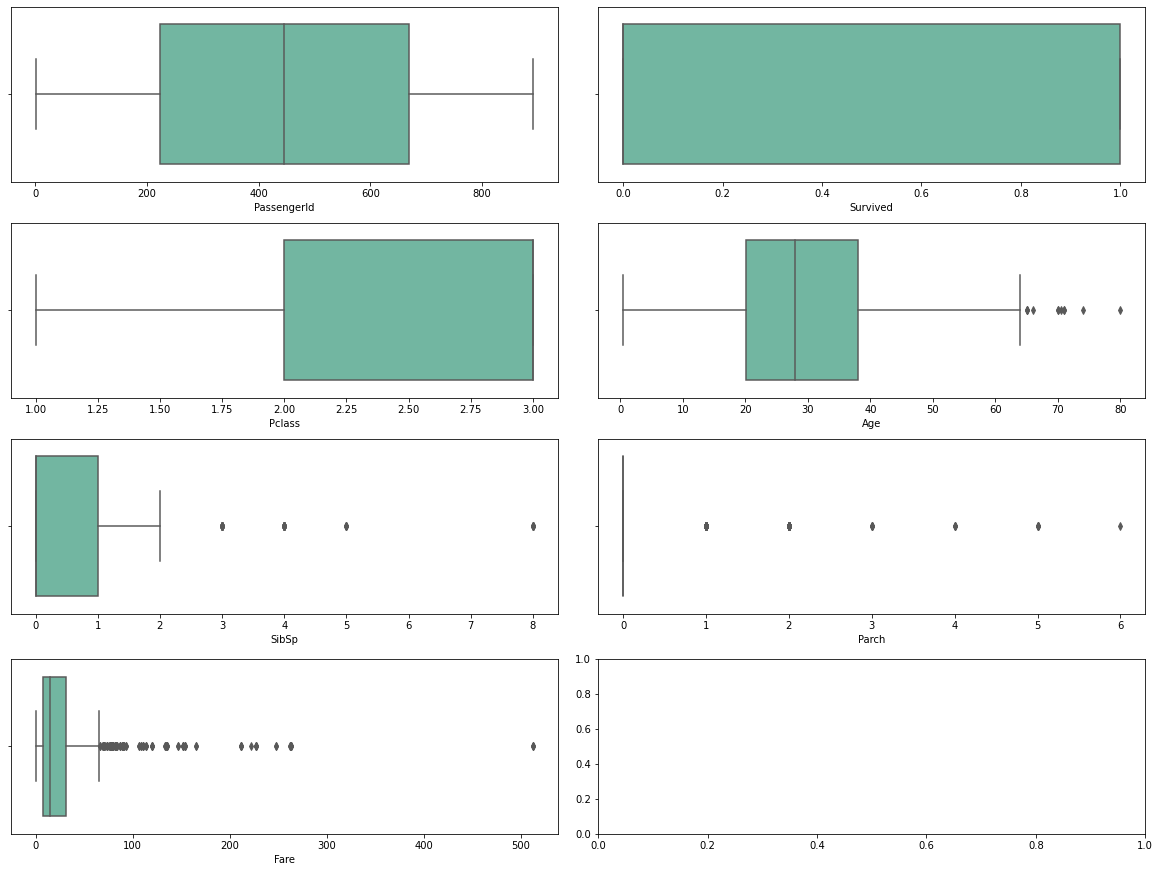

In [ ]:
n = len(data[non_categorical].columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(4,n//3,figsize=(16,12),constrained_layout=True)

for i, col in enumerate(data[non_categorical].columns):
  sns.boxplot(x=col, data=train, ax=ax[i//2,i%2], palette='Set2')
plt.show() 

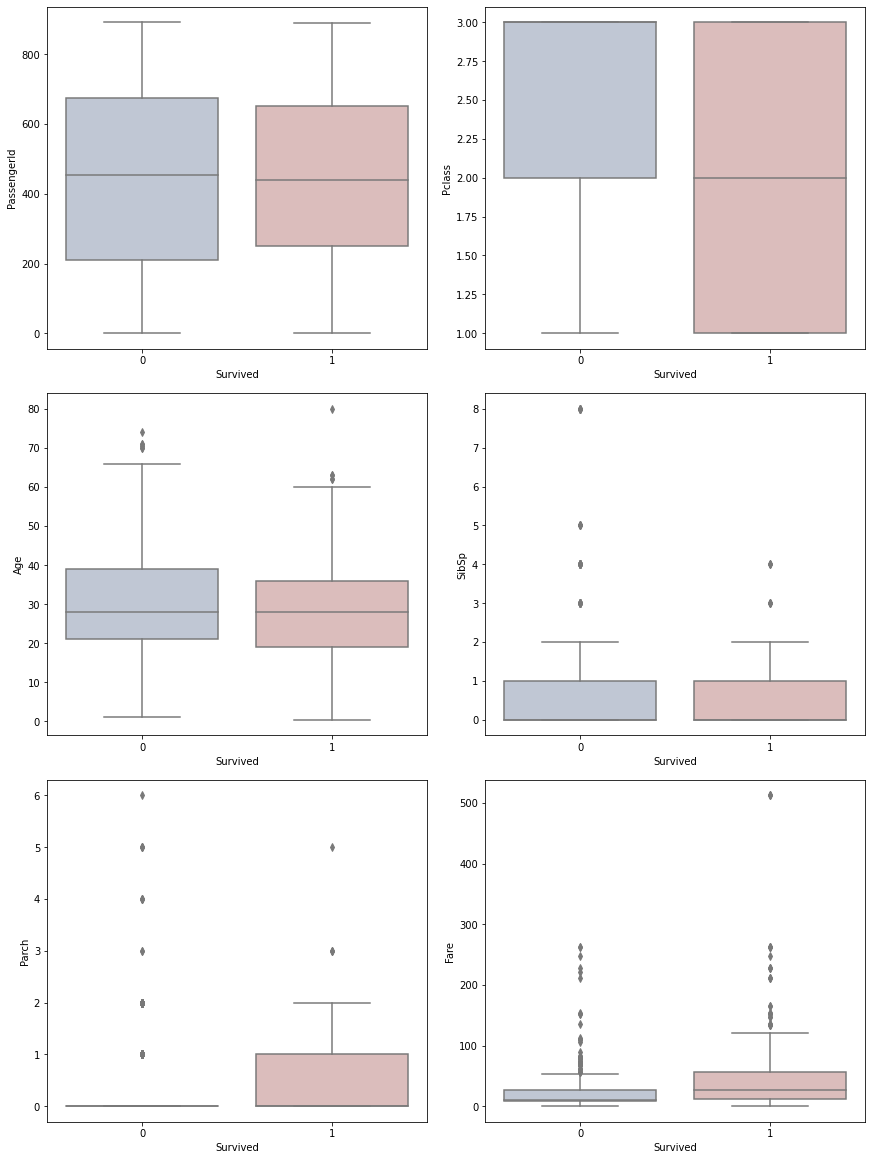

In [ ]:
#outliner_2

wthoutS = data[non_categorical].copy().drop('Survived',axis=1)
n = len(wthoutS.columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(3,n//3,figsize=(12,16),constrained_layout=True)

for i, col in enumerate(wthoutS.columns):
  sns.boxplot(x='Survived', y=col, data=data[non_categorical], ax=ax[i//2,i%2], palette='vlag')
plt.show()  

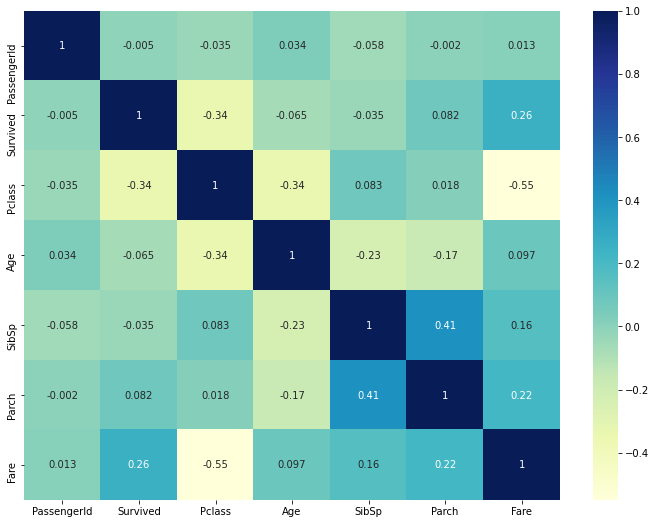

In [66]:
corr = data.corr()
f = plt.figure(figsize = (12,9))
sns.heatmap(data=corr.round(3),annot=True,cmap='YlGnBu')
plt.show()

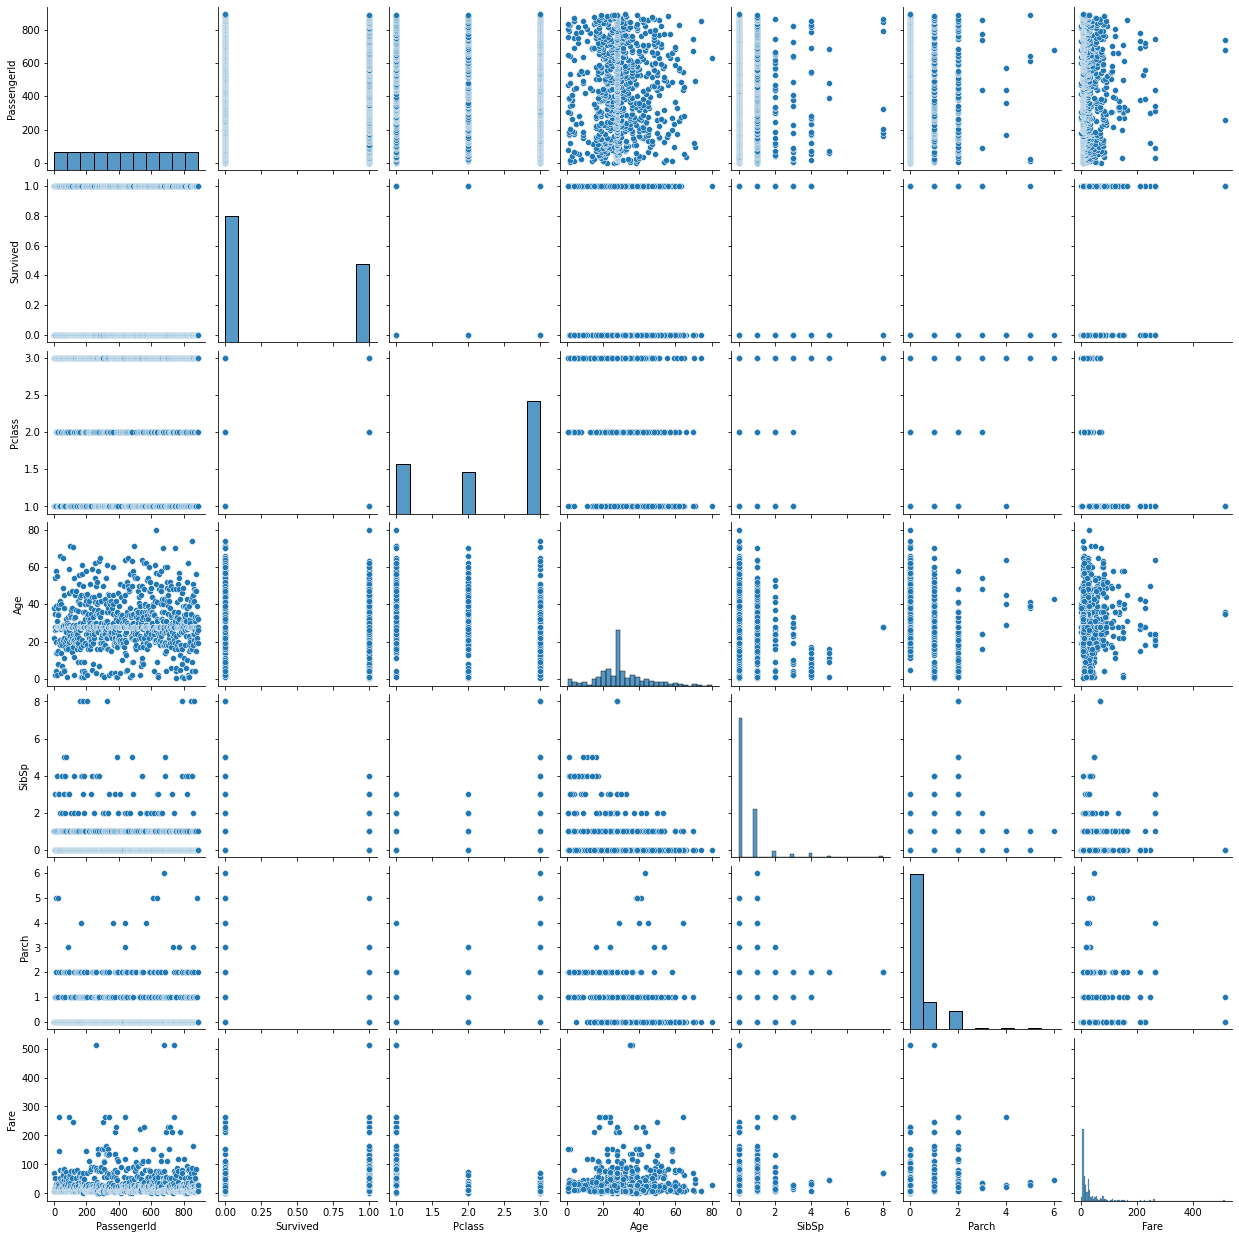

In [72]:
sns.pairplot(data,palette='gist_rainbow')
plt.show()

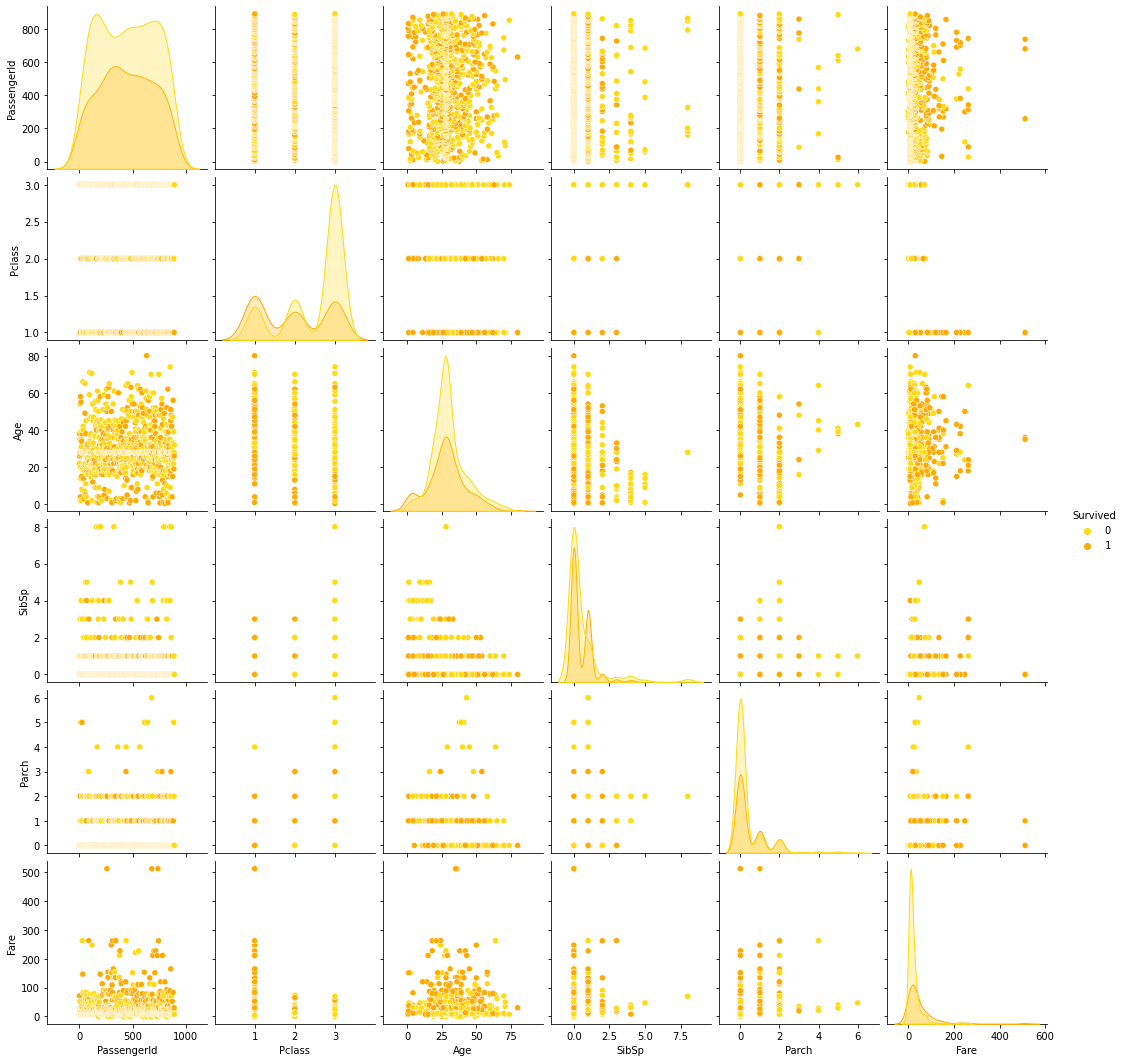

In [80]:
sns.pairplot(data,hue='Survived',palette='Wistia')
plt.show()

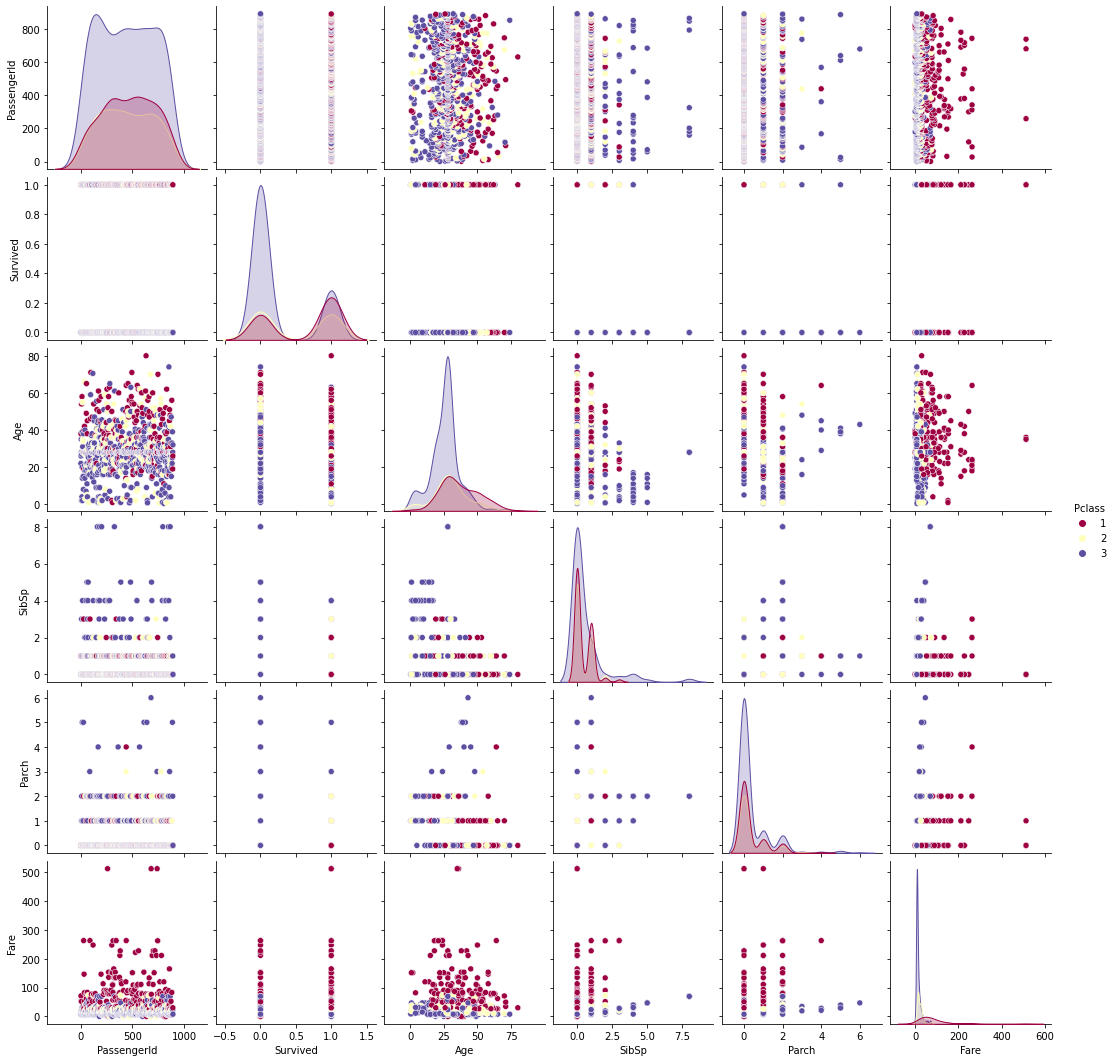

In [81]:
sns.pairplot(data,hue='Pclass',palette='Spectral')
plt.show()

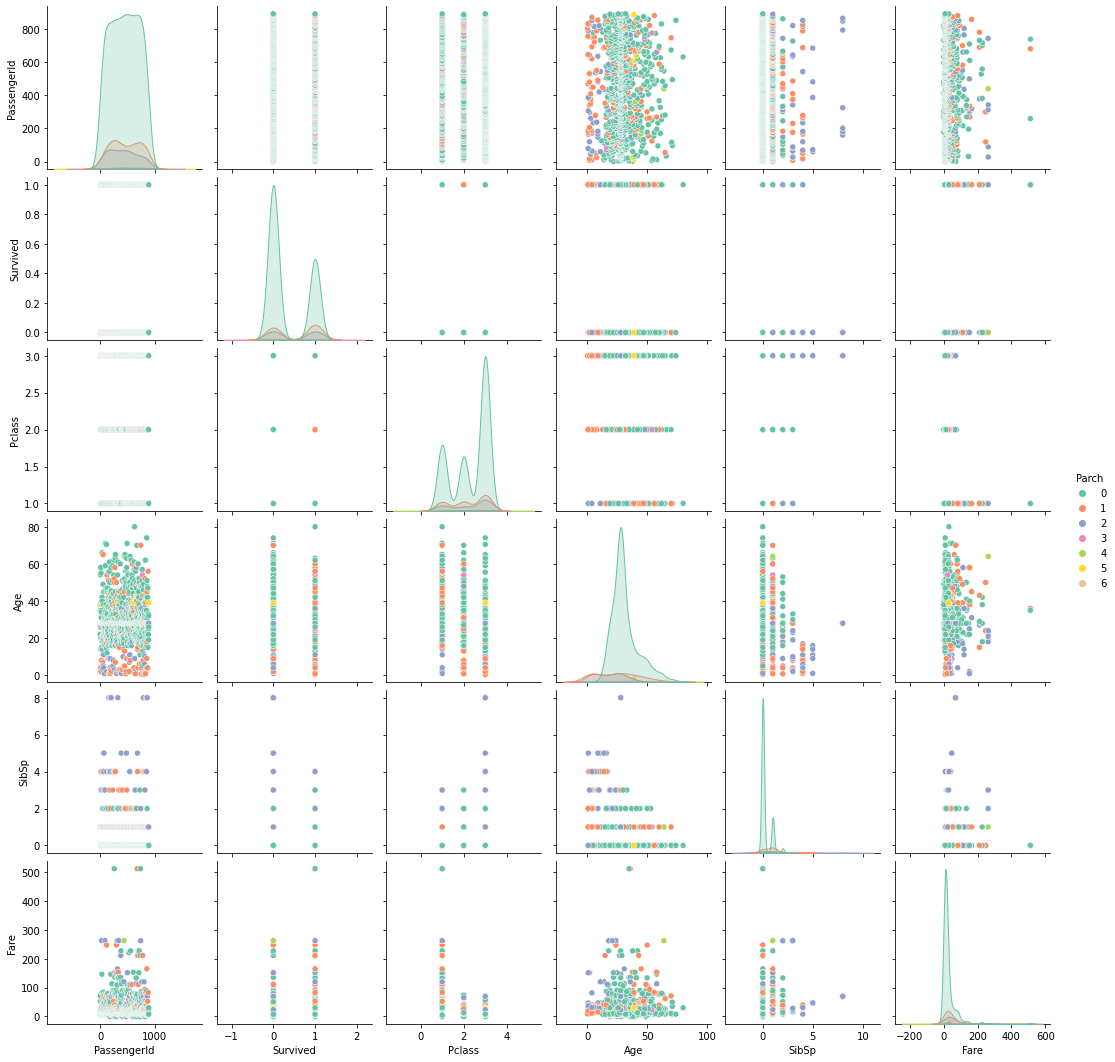

In [76]:
sns.pairplot(data,hue='Parch',palette='Set2')

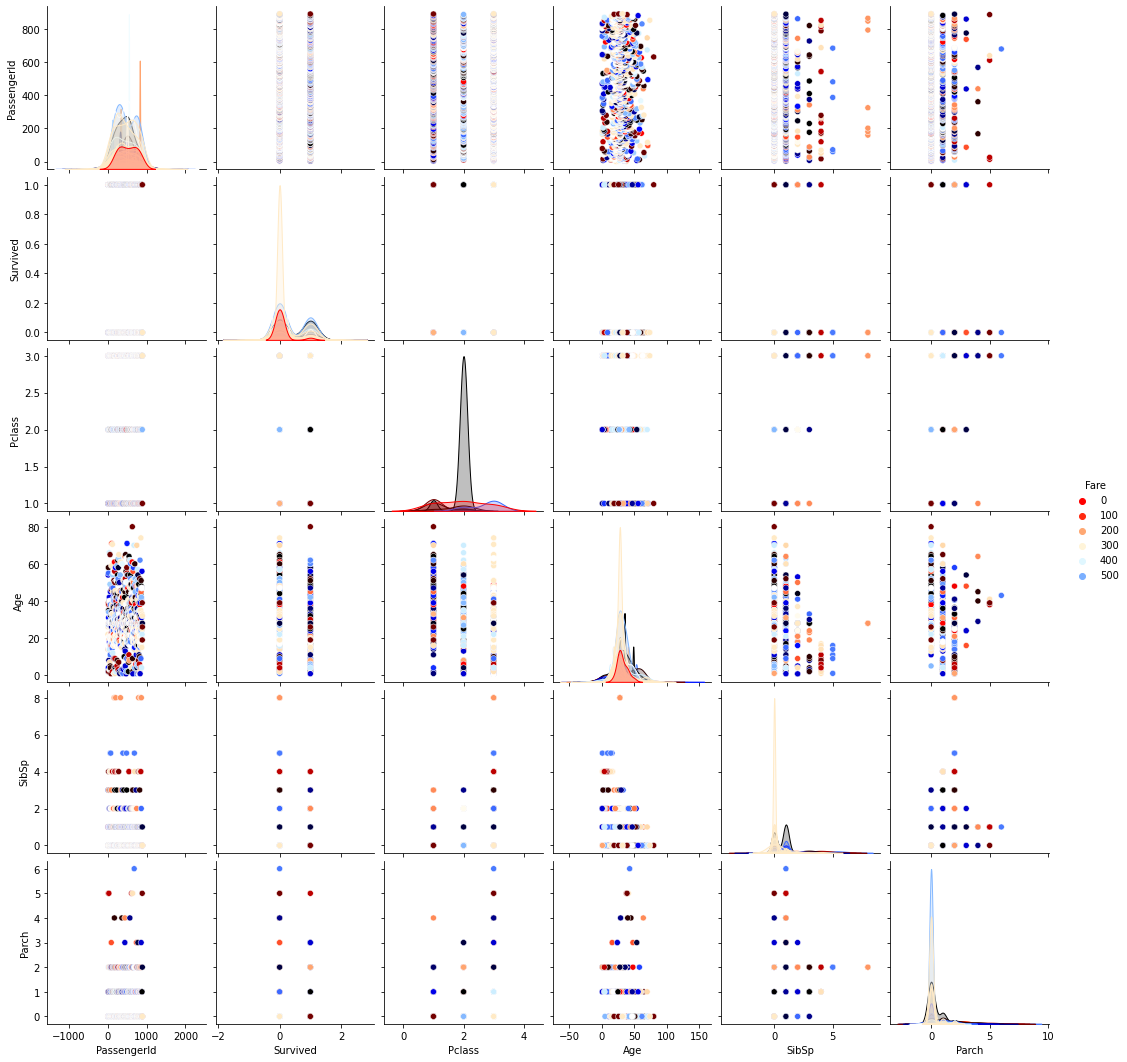

In [78]:
sns.pairplot(data,hue='Fare',palette='flag')

In [ ]:
data.Age.mode()

0    24.0
dtype: float64

In [ ]:
data['Age'] = data['Age'].fillna(data.Age.median())

In [ ]:
print(data[data['Pclass']==1].count())  #Cabin missing value(40)  #Embarked missing value(2)
print('-'*250)
print(data[data['Pclass']==2].count()) #Cabin missing value(168)
print('-'*250)
print(data[data['Pclass']==3].count())  #Cabin missing value(479)

PassengerId    216
Survived       216
Pclass         216
Name           216
Sex            216
Age            216
SibSp          216
Parch          216
Ticket         216
Fare           216
Cabin          176
Embarked       214
dtype: int64

In [ ]:
print(data[data['Pclass']==1].Cabin.unique())

['C85' 'C123' 'E46' 'C103' 'A6' 'C23 C25 C27' nan 'B78' 'D33' 'B30' 'C52'
 'B28' 'C83' 'E31' 'A5' 'D10 D12' 'D26' 'C110' 'B58 B60' 'D47' 'B86' 'C2'
 'E33' 'B19' 'A7' 'C49' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78'
 'D35' 'C87' 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49'
 'C22 C26' 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32'
 'B18' 'C124' 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98'
 'E44' 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30'
 'D20' 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16'
 'C101' 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26'
 'D48' 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'D11' 'B3' 'D6' 'B82 B84' 'D17'
 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']


In [ ]:
print(data[data['Pclass']==2].count()) #Cabin missing value(168)

PassengerId    184
Survived       184
Pclass         184
Name           184
Sex            184
Age            184
SibSp          184
Parch          184
Ticket         184
Fare           184
Cabin           16
Embarked       184
dtype: int64

In [ ]:
print(data[data['Pclass']==2].Cabin.unique())

array([nan, 'D56', 'F33', 'E101', 'F2', 'F4', 'D', 'E77'], dtype=object)

In [ ]:
print(data[data['Pclass']==3].count())  #Cabin missing value(479)

PassengerId    491
Survived       491
Pclass         491
Name           491
Sex            491
Age            491
SibSp          491
Parch          491
Ticket         491
Fare           491
Cabin           12
Embarked       491
dtype: int64

In [ ]:
print(data[data['Pclass']==3].Cabin.unique())

array([nan, 'G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38'],
      dtype=object)

In [ ]:
import re

data['Cabin'] = data['Cabin'].strip.re([0-9])

AttributeError: ignored

In [ ]:
data[data['Parch']==4].count()

PassengerId    4
Survived       4
Pclass         4
Name           4
Sex            4
Age            4
SibSp          4
Parch          4
Ticket         4
Fare           4
Cabin          1
Embarked       4
dtype: int64